# **Motion Capture Hand Postures**

**Dataset:** Motion Capture Hand Postures https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures

**Code:** Chapter 7 Ensemble Learning from `Hands-On Machine Learning with Scikit-Learn and TensorFlow` book (Aurélien Géron)

In [1]:
# Common imports
import numpy as np
import os

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Get the data

Predict one of the 5 types of hand postures from glove markers recordings.

### Dataset attributes as described on UCI:
A Vicon motion capture camera system was used to record 12 users performing 5 hand postures with markers attached to a left-handed glove.

A rigid pattern of markers on the back of the glove was used to establish a local coordinate system for the hand, and 11 other markers were attached to the thumb and fingers of the glove. 3 markers were attached to the thumb with one above the thumbnail and the other two on the knuckles. 2 markers were attached to each finger with one above the fingernail and the other on the joint between the proximal and middle phalanx.

Class' - Integer. The class ID of the given record. Ranges from 1 to 5 with 1=Fist(with thumb out), 2=Stop(hand flat), 3=Point1(point with pointer finger), 4=Point2(point with pointer and middle fingers), 5=Grab(fingers curled as if to grab).
'User' - Integer. The ID of the user that contributed the record. No meaning other than as an identifier.
'Xi' - Real. The x-coordinate of the i-th unlabeled marker position. 'i' ranges from 0 to 11.
'Yi' - Real. The y-coordinate of the i-th unlabeled marker position. 'i' ranges from 0 to 11.
'Zi' - Real. The z-coordinate of the i-th unlabeled marker position. 'i' ranges from 0 to 11.

In [2]:
HAND_POSTURE_PATH = "dataset"

def load_hand_posture_data(hand_posture_path=HAND_POSTURE_PATH):
    csv_path = os.path.join(hand_posture_path, "Postures.csv")
    return pd.read_csv(csv_path)

In [3]:
hand_posture = load_hand_posture_data()
hand_posture.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


Remove the first row of zeros:

In [4]:
hand_posture.drop([0], axis=0, inplace=True)

In [5]:
hand_posture.replace(to_replace='?', value=np.nan, inplace=True)

In [6]:
hand_posture["Class"].value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

In [7]:
hand_posture.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000
mean,2.983776,7.959229,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906
std,1.421152,4.697754,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384
min,1.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339
50%,3.000000,9.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535
75%,4.000000,12.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


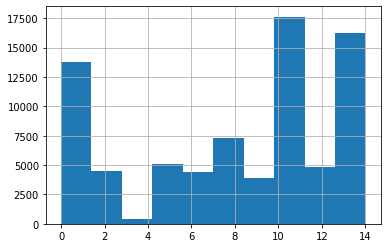

In [8]:
hand_posture["User"].hist()

## Data visualization

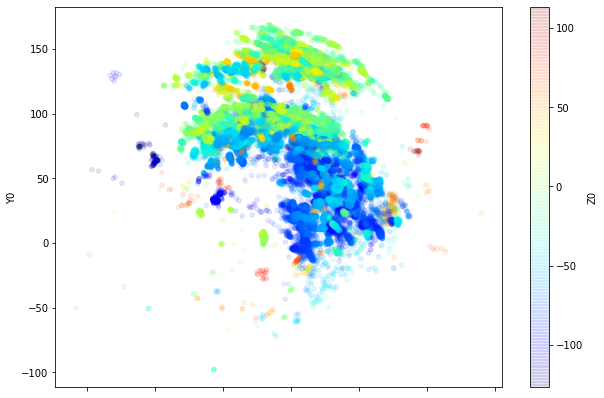

In [9]:
hand_posture.plot.scatter(x="X0", y="Y0", c="Z0", figsize=(10,7), alpha=0.1,
                         cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

In [10]:
corr_matrix = hand_posture.corr()

In [11]:
corr_matrix["Class"].sort_values(ascending=False)

Class    1.000000
Y2       0.169251
Y1       0.144086
Z2       0.095538
Z1       0.089920
Y0       0.081755
X0       0.080171
Z0       0.051857
X1      -0.010569
User    -0.030714
X2      -0.052392
Name: Class, dtype: float64

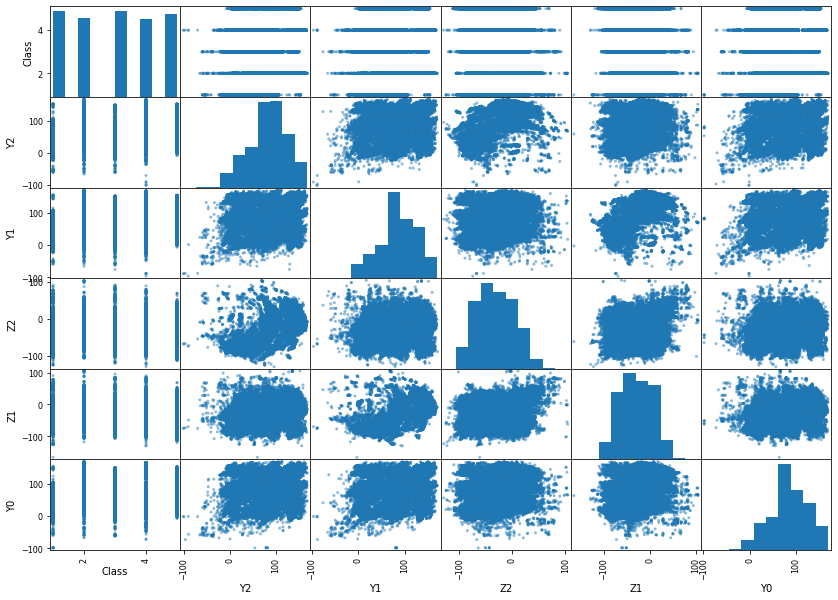

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["Class", "Y2", "Y1", "Z2", "Z1", "Y0"]
scatter_matrix(hand_posture[attributes], figsize=(14, 10))
plt.show()

### Split the data in training and test sets

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hand_posture, test_size=0.2, random_state=42)

# Data preparation

In [14]:
X_train = train_set.drop("Class", axis=1) # drop labels for training set
y_train = train_set["Class"].copy()

In [15]:
X_test = test_set.drop("Class", axis=1) 
y_test = test_set["Class"].copy()

Shuffle the training data:

In [16]:
np.random.seed(42)

shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

Expecting empty rows, so we will need to **impute**:

In [17]:
sample_incomplete_rows = X_train[X_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
21751,5,-17.249692,95.311663,-15.945789,34.205710,143.935878,11.155273,16.475132,157.609920,16.416232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65971,13,68.174313,127.465928,-22.372665,62.971643,89.340837,-17.785914,56.753325,56.574785,-59.898137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49125,11,24.653436,101.261292,-30.090965,67.925991,20.346865,-56.826613,75.913942,79.557321,-54.646795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51984,11,111.690745,47.359495,-48.044683,45.294747,136.197879,-13.258849,49.858929,96.324730,-7.486027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49396,11,65.636054,20.955274,-60.130811,4.599956,97.483984,-23.557918,47.951224,98.469614,-29.116127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),    
    ('std_scaler', StandardScaler()),
    ])

X_train_prepared = num_pipeline.fit_transform(X_train)

In [19]:
X_train_prepared.shape

(62476, 37)

In [20]:
imputer = SimpleImputer(strategy="median")

X_test_prepared = num_pipeline.fit_transform(X_test)

# Common functions

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

def performance_scores(y, y_predict):
    print("Accuracy score:\t\t", accuracy_score(y, y_predict))
    print("Precision score:\t", precision_score(y, y_predict, average='weighted'))
    print("Recall score:\t\t", recall_score(y, y_predict, average='weighted'))   
    print("F1 score:\t\t", f1_score(y, y_predict, average='weighted'))   
    return

def show_roc_curves(y, y_predict, n_classes=5):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        y_i = (y == i+1)
        y_predict_i = (y_predict == i+1)
        fpr[i], tpr[i], _ = roc_curve(y_i, y_predict_i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = ['red', 'yellow', 'blue', 'green', 'purple']

    plt.figure()
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, label="ROC for class {0} (area= {1:0.2f})"
                ''.format(i+1, roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("FPR / 1 - TNR / 1 - specificity")
    plt.ylabel("TPR / sensitivity")
    plt.legend(loc="lower right")

    plt.show()
    return

## Separate Classifiers

### Random Forest Classifier###

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_predict = cross_val_predict(forest_clf, X_train_prepared, 
                                    y_train, cv=3)

In [23]:
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
y_test_predict = forest_clf.predict(X_test_prepared)

In [25]:
performance_scores(y_test, y_test_predict)

Accuracy score:		 0.6276970356616941
Precision score:	 0.8404304373223038
Recall score:		 0.6276970356616941
F1 score:		 0.6010112384704512


**Confusion matrix:**

In [26]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[2190,   41,    0,    0, 1016],
       [   0, 2955,    0,    0,   50],
       [   1,  100,  393,   11, 2710],
       [   0,  429,    0, 1137, 1442],
       [   0,   15,    0,    0, 3129]], dtype=int64)

**ROC Curves for all classes**

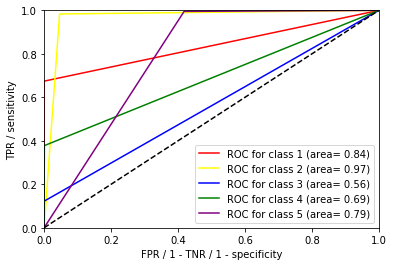

In [27]:
show_roc_curves(y_test, y_test_predict, 5)

### SGD Classifier###

In [28]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
y_predict = cross_val_predict(sgd_clf, X_train_prepared, 
                                    y_train, cv=3)

In [29]:
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
y_test_predict = sgd_clf.predict(X_test_prepared)

In [31]:
performance_scores(y_test, y_test_predict)

Accuracy score:		 0.7326973557846213
Precision score:	 0.7266354126540348
Recall score:		 0.7326973557846213
F1 score:		 0.7270996149213459


In [32]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[2838,   13,   95,  104,  197],
       [  37, 2702,   64,   12,  190],
       [ 453,   13, 2087,  543,  119],
       [ 262,  192,  570, 1569,  415],
       [ 169,  358,  127,  242, 2248]], dtype=int64)

### Ridge Classifier###

In [33]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier(random_state=42)
y_predict = cross_val_predict(ridge_clf, X_train_prepared, 
                                    y_train, cv=3)

In [34]:
ridge_clf.fit(X_train_prepared, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)

In [35]:
y_test_predict = ridge_clf.predict(X_test_prepared)

In [36]:
performance_scores(y_test, y_test_predict)

Accuracy score:		 0.7197643895255779
Precision score:	 0.7199723811405561
Recall score:		 0.7197643895255779
F1 score:		 0.7122217080201376


In [37]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[2929,   49,  124,    2,  143],
       [  32, 2476,   62,   98,  337],
       [ 584,   89, 2207,  270,   65],
       [ 353,  257,  591, 1436,  371],
       [ 241,  426,  101,  182, 2194]], dtype=int64)

## Ensemble of classifiers##

In [38]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
                        estimators = [('rf', forest_clf), ('sgd', sgd_clf), ('rc', ridge_clf)],
                        voting='hard'
                )

In [39]:
voting_clf.fit(X_train_prepared, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [40]:
y_test_predict = voting_clf.predict(X_test_prepared)

In [41]:
performance_scores(y_test, y_test_predict)

Accuracy score:		 0.7434534861386772
Precision score:	 0.7483082753946539
Recall score:		 0.7434534861386772
F1 score:		 0.7341687423537355


In [42]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[2936,   18,   87,    2,  204],
       [  35, 2747,   37,   12,  174],
       [ 620,   79, 2179,  202,  135],
       [ 313,  302,  534, 1422,  437],
       [ 185,  390,   99,  142, 2328]], dtype=int64)

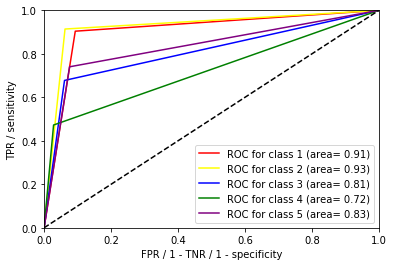

In [43]:
show_roc_curves(y_test, y_test_predict, 5)

<table>
    <thead>
        <tr>
            <th colspan="5">Performance of models</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Model</b></td>
            <td><b>Accuracy</b></td>
            <td><b>Precision</b></td>
            <td><b>Recall</b></td>
            <td><b>F1</b></td>
        </tr>
         <tr>
            <td><b>Random Forest Classifier</b></td>
            <td>0.6276</td>
            <td><b>0.8404</b></td>
            <td>0.6276</td>
            <td>0.6010</td>
        </tr>
         <tr>
            <td><b>SGD Classifier</b></td>
            <td>0.7326</td>
            <td>0.7266</td>
            <td>0.7326</td>
            <td>0.7270</td>
        </tr>
         <tr>
            <td><b>Ridge Classifier</b></td>
            <td>0.7197</td>
            <td>0.7199</td>
            <td>0.7197</td>
            <td>0.7122</td>
        </tr>
        <tr>
            <td><b>Ensemble 3 classifiers</b></td>
            <td><b>0.7434</b></td>
            <td>0.7483</td>
            <td><b>0.7434</b></td>
            <td><b>0.7341</b></td>
        </tr>
    </tbody>
</table>

## Extra Trees Classifier##

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(random_state=42)
y_predict = cross_val_predict(ex_tree_clf, X_train_prepared, 
                                    y_train, cv=3,
                                    method="predict_proba")

In [45]:
ex_tree_clf.fit(X_train_prepared, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [46]:
y_test_predict = ex_tree_clf.predict(X_test_prepared)

In [47]:
performance_scores(y_test, y_test_predict)

Accuracy score:		 0.9908444842819643
Precision score:	 0.9908483824166244
Recall score:		 0.9908444842819643
F1 score:		 0.9908433571246424


In [48]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[3230,   12,    5,    0,    0],
       [   3, 2955,    6,   18,   23],
       [   5,    0, 3188,   17,    5],
       [   2,    0,   22, 2982,    2],
       [   0,   20,    1,    2, 3121]], dtype=int64)

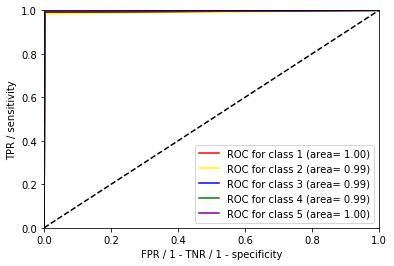

In [49]:
show_roc_curves(y_test, y_test_predict, 5)

**Almost perfect model!** The model itself is an ensemble.